#  FLIGHT PRICE PREDICTION MODEL

### BUSINESS CASE:
* The aim of this project is to build a machine learning model to predict flight ticket prices based on features such as airline, source, destination, route, number of stops,and duration.
* Flight ticket prices fluctuate frequently and unpredictably, making it difficult for travelers to plan trips and for airlines to set consistent pricing. The resulting model will assist airlines in optimizing pricing strategies and travelers in making informed booking decisions, thereby reducing unpredictability in flight fares.


### IMPORT LIBRARIES

In [30]:
import pandas as pd  # importing pandas for analyzing, cleaning, exploring, and manipulating data
import seaborn as sns # for statistical data visualization
#Seaborn is a library that uses Matplotlib underneath to plot graphs.
import numpy as np # for numerical operations
import matplotlib.pyplot as plt # for data visualization
import warnings
warnings.filterwarnings('ignore') # to ignore warning messages

### DOMAIN ANALYSIS

In [33]:
#data is in excel file so we have to call pd.read_excel from pandas
df = pd.read_excel("Flight_Fare.xlsx")  # Loading dataset

### Feature Description
### 1. **Airline**

* **Description:** Name of the airline operating the flight (e.g., IndiGo, Air India, Jet Airways).
* **Type**:Categorical
* **Remarks:** Different airlines have distinct pricing strategies and service levels that affect fare.

### 2. **Date_of_Journey**

* **Description:** The date on which the flight is scheduled to depart.
* **Type:** Date/Time
* **Remarks:** Prices often vary depending on the month, day, or season.

### 3. **Source**

* **Description:** The departure city of the flight.
* **Type:** Categorical 
* **Remarks:** Fares differ depending on the origin city due to demand and route popularity.

### 4. **Destination**

* **Description:** The arrival city of the flight.
* **Type:** Categorical 
* **Remarks:** Similar to source, destination impacts fare due to distance and market demand.

### 5. **Route**

* **Description:** The path taken by the flight (e.g., DEL → BOM → BLR).
* **Type:** Categorical 
* **Remarks:** The number of connections and route structure can influence duration and price.

### 6. **Dep_Time**

* **Description:** Scheduled departure time of the flight.
* **Type:** Time
* **Remarks:** Flights at peak hours (morning/evening) usually have higher fares.

### 7. **Arrival_Time**

* **Description:** Scheduled arrival time of the flight.
* **Type:** Time
* **Remarks:** Combined with departure time, helps calculate total duration and time-based fare variations.

### 8. **Duration**

* **Description:** Total time taken by the flight from departure to arrival.
* **Type:** Numeric
* **Remarks:** Longer flights generally cost more; one of the most influential features.

### 9. **Total_Stops**

* **Description:** Total number of stops or layovers (e.g., non-stop, 1 stop, 2 stops).
* **Type:** Categorical
* **Remarks:** Non-stop flights are typically more expensive than those with multiple stops.

### 10. **Additional_Info**

* **Description:** Miscellaneous flight details (e.g., “No info”, “In-flight meal not included”).
* **Type:** Categorical 
* **Remarks:** Adds minor context that can impact fare slightly.

### 11. **Price**

* **Description:** The final ticket price for the flight (Target Variable).
* **Type:** Numeric
* **Remarks:** This is the dependent variable to be predicted.

In [35]:
df.head()  # it is going to show first 5 rows

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [36]:
df.columns # Checking coloums of dataset

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [37]:
df.tail() # it is going to show last 5 rows

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


## BASIC CHECK

In [39]:
df.info() # it is use to get informations about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [40]:
df.shape # size of the dataset

(10683, 11)

In [41]:
df.describe() # it shows statistical informations about our dataset

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [49]:
df.describe(include="O") # Check basic statistics of the dataset categorical columns
# This helps understand data distribution, central tendency, and spread

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


### Statistics Summary

* **Airline:** 12 unique airlines.
Most frequent airline: Jet Airways (3,849 occurrences).

* **Date_of_Journey:** 44 unique journey dates.
Most common journey date: 18/05/2019 (504 occurrences).

* **Source:** 5 unique source cities.
Most common source: Delhi (4,537 occurrences).

* **Destination:** 6 unique destination cities.
Most common destination: Cochin (4,537 occurrences).

* **Route:** 128 unique routes.
Most common route: DEL → BOM → COK (2,376 occurrences).

* **Dep_Time (Departure Time):** 222 unique times.
Most common departure time: 18:55 (233 occurrences).

* **Arrival_Time:** 1,343 unique times.
Most common arrival time: 19:00 (423 occurrences).

* **Duration:** 368 unique durations.
Most frequent duration: 2h 50m (550 occurrences).

* **Total_Stops:** 5 unique values.
Most common stop type: 1 stop (5,625 occurrences).

* **Additional_Info:** 10 unique categories.
Most common info: No info (8,345 occurrences).

In [52]:
# Drop unnecessary columns
df.drop(['Date_of_Journey','Route','Arrival_Time','Additional_Info'],axis=1,inplace=True)

In [54]:
#  Convert to datetime 
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])

df['Dep_Time'] = df['Dep_Time'].dt.hour
df['Dep_Time']

0        22
1         5
2         9
3        18
4        16
         ..
10678    19
10679    20
10680     8
10681    11
10682    10
Name: Dep_Time, Length: 10683, dtype: int32

In [56]:
# Convet Duration
def convert_duration(duration):
    
    hours = 0
    minutes = 0
    
    if 'h' in duration:
        hours = int(duration.split('h')[0].strip())
        duration = duration.split('h')[1]
    else:
        duration = duration
    
    if 'm' in duration:
        minutes = int(duration.split('m')[0].strip())
        
    return hours * 60 + minutes


# Apply to your column
df['Duration'] = df['Duration'].apply(convert_duration)
df['Duration']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration, Length: 10683, dtype: int64

## EXPLORATORY DATA ANALYSIS

### UNIVARIATE ANALYSIS

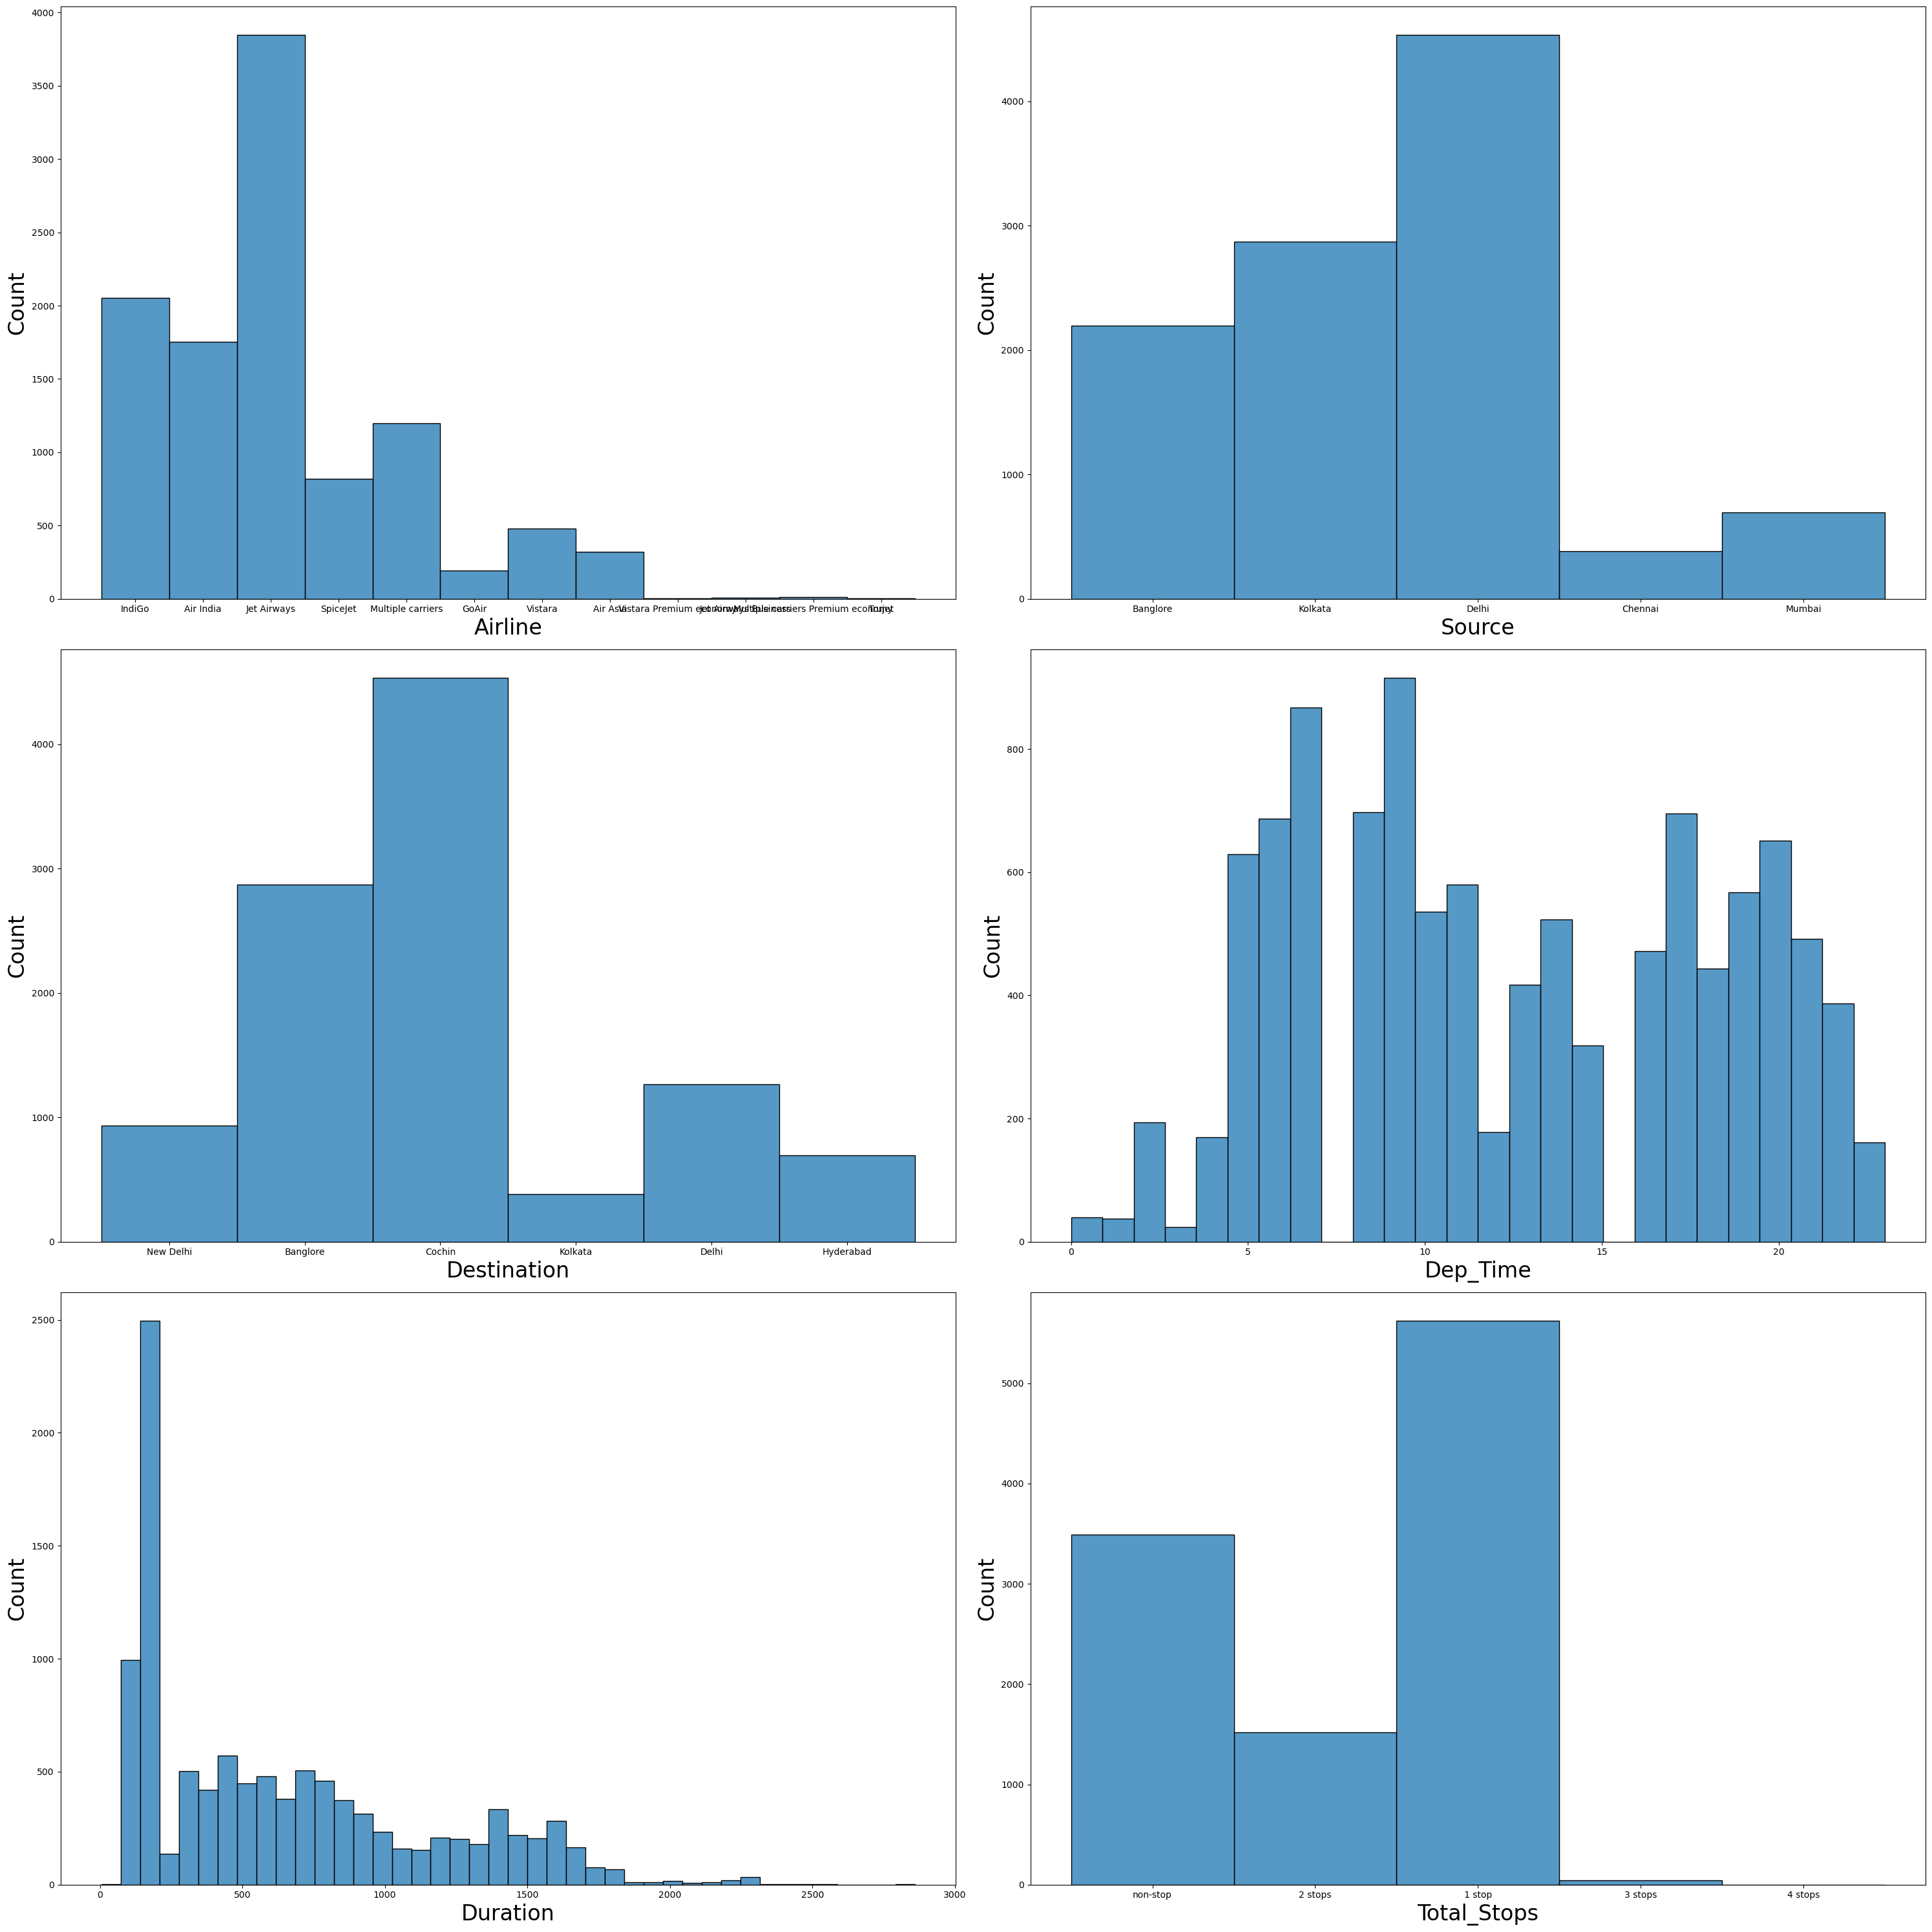

In [23]:
plt.figure(figsize=(30,30), facecolor='white')  # create figure for plots
plotnumber = 1  # initialize plotnumber
for column  in df.drop('Price',axis=1):
    if plotnumber <= 6:
        ax = plt.subplot(3, 2, plotnumber)
        sns.histplot(x=df[column])
        plt.xlabel(column,fontsize=24)
        plt.ylabel("Count",fontsize=24)
    plotnumber += 1
plt.tight_layout()  
plt.show()

#### Insights:
1.**Airline**:Airlines like IndiGo and Air India appear most frequently.It shows that some airlines have a much higher frequency than others.

2.**Source**:It shows that Delhi and Kolkata have the highest number of flights.Majority of flights originate from metro cities, indicating they are major travels cities.

3.**Destination**:It shows that Cochin and Bangalore are the most common destinations.This shows the dataset mainly covers popular travel routes.

4.**Duration**:The distribution is right-skewed and most flights are of short to medium duration (1–4 hours).

5.**Total_Stops**:It shows clear peaks for “non-stop” and “1 stop” categories.Most flights are short or direct, indicating passengers prefer minimal stops.

6.**Dep_Time**:Morning and evening hours (around 6–10 AM and 6–10 PM)have the highest number of flights.Flights during peak hours may have higher fares due to demand.

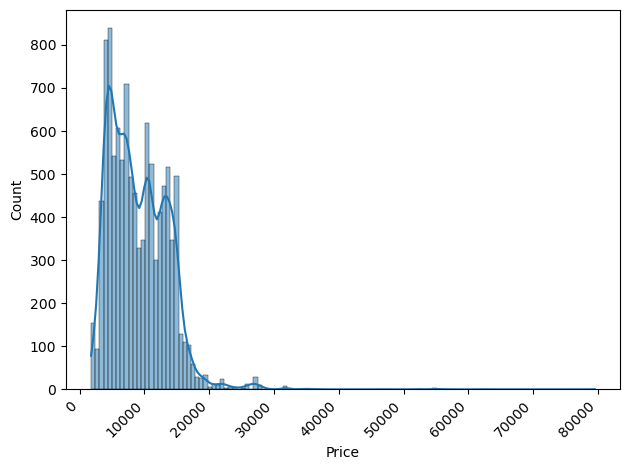

In [25]:
# Price
sns.histplot(x='Price',data=df,palette='hls',kde=True)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

#### Insights :
* The right-skewed nature of the price distribution means that Average fare values are pulled upward by a few expensive tickets.

* Most flights in the dataset are economy or short-distance, while high prices represent business class or multi-stop international routes.

* This suggests that Price varies widely based on route, airline, and duration.

### BIVARIATE ANALYSIS

In [28]:
### AIRLINES VS PRICE

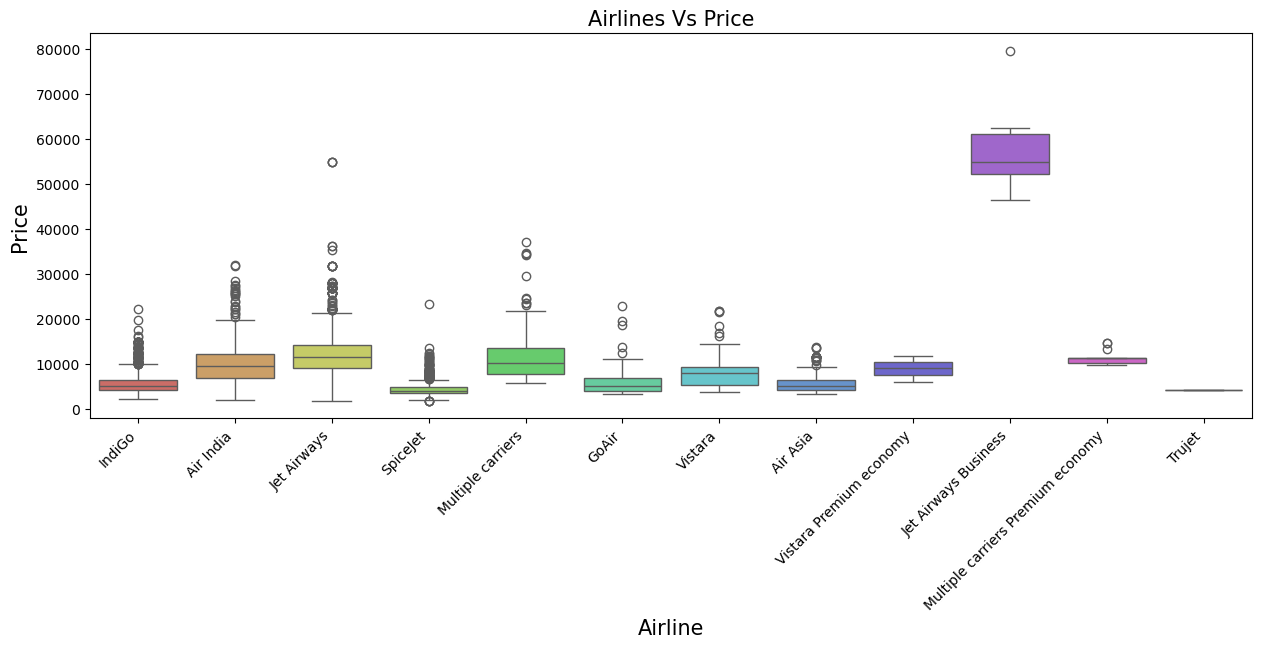

In [29]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['Airline'],y=df['Price'],palette='hls')
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.show()

#### Insights:
* It shows significant variation in average fare across airlines.

* Airlines like Jet Airways and Air India have higher median prices, while IndiGo and SpiceJet offer lower fares.
* Airline choice has a strong impact on price — premium airlines charge higher fares due to service quality and brand value.

In [31]:
### SOURCE VS PRICE

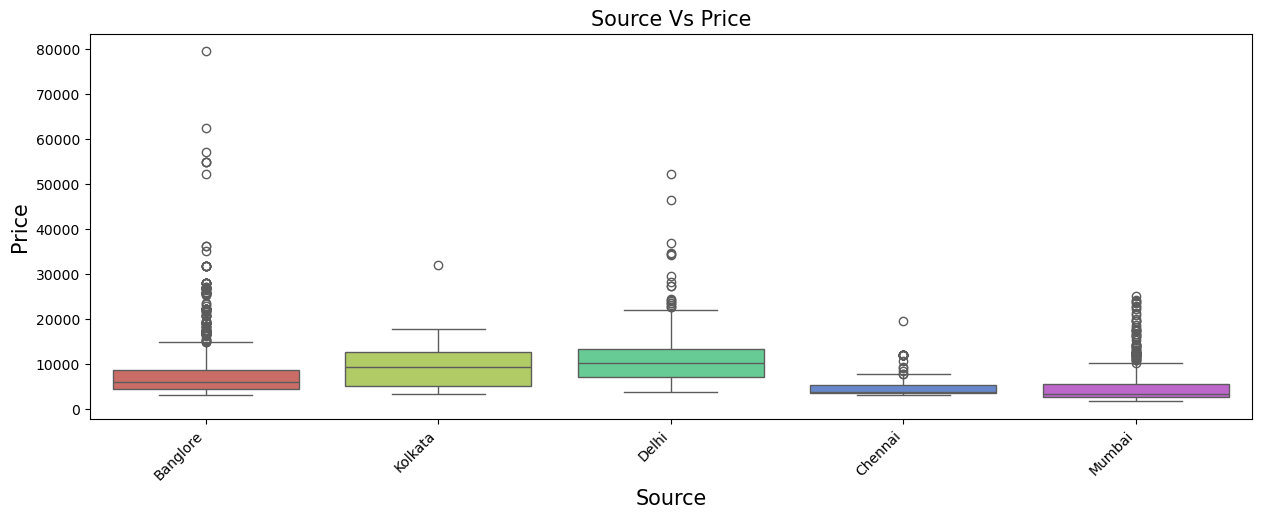

In [32]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['Source'],y=df['Price'],palette='hls')
plt.title('Source Vs Price',fontsize=15)
plt.xlabel('Source',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.show()

#### Insights:
* The average fare varies by source city.

* Some Flights tend to have higher prices, while Chennai and Mumbai are comparatively lower.
* Price differences across sources show that origin city demand and airport traffic affect ticket pricing.

In [34]:
### DESTINATION VS PRICE

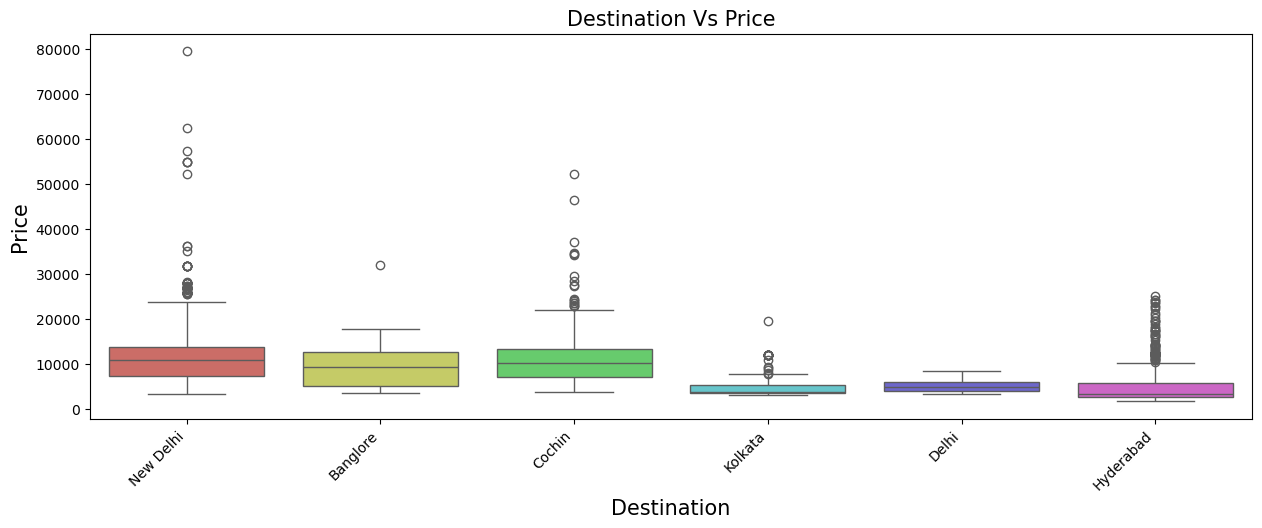

In [35]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['Destination'],y=df['Price'],palette='hls')
plt.title('Destination Vs Price',fontsize=15)
plt.xlabel('Destination',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.show()

#### Insights:
* Some Destinations show moderately higher average fares, while others like Delhi or Kolkata are lower.
* Flight fares depend on destination popularity and route length — major business hubs tend to have higher fares.These differences are driven by distance, route frequency, and seasonal travel trends

In [37]:
### TOTAL_STOPS VS PRICE

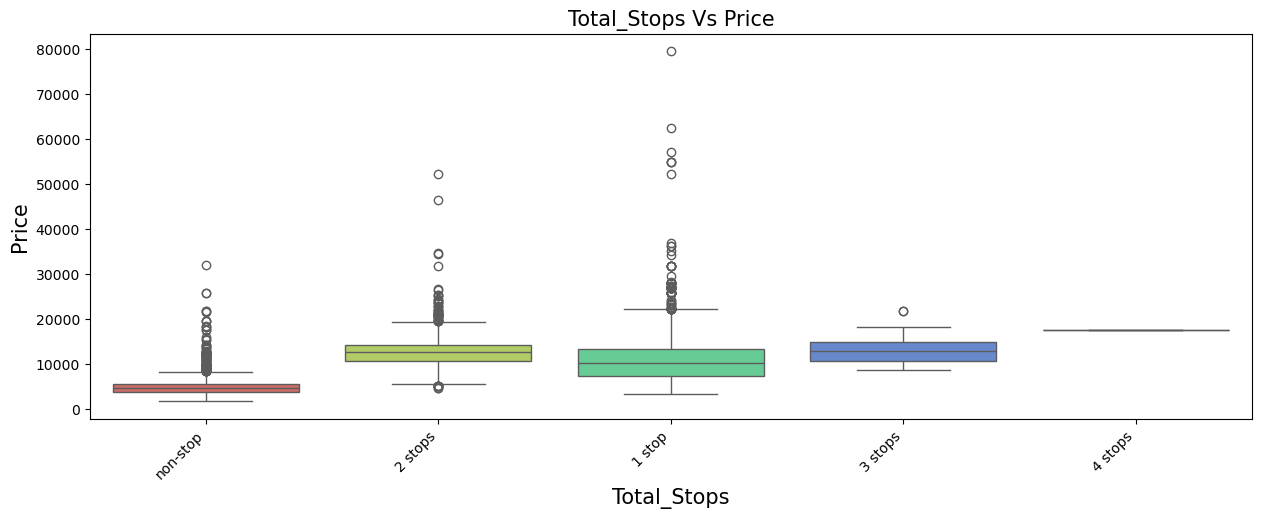

In [38]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['Total_Stops'],y=df['Price'],palette='hls')
plt.title('Total_Stops Vs Price',fontsize=15)
plt.xlabel('Total_Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.show()

#### Insights:
* As the number of stops increases, the price generally decreases.
* Price decreases with an increase in Total Stops — passengers pay extra for faster, non-stop travel.This reflects the convenience premium passengers pay for direct flights.

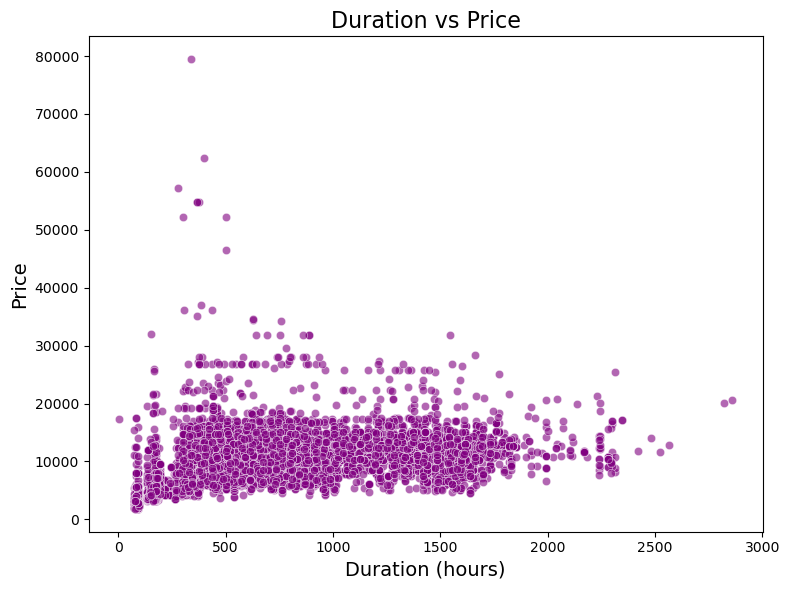

In [40]:
# Duration vs Price
plt.figure(figsize=(8,6))
sns.scatterplot(x='Duration', y='Price', data=df, color='purple', alpha=0.6)
plt.title("Duration vs Price", fontsize=16)
plt.xlabel("Duration (hours)", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.tight_layout()
plt.show()

#### Insights
* The scatterplot shows a positive correlation between Duration and Price.
As the duration of the flight increases, the fare also increases.
* Price tends to rise with Duration — a strong direct relationship exists between flight time and fare.

### MULTIVARIATE ANALYSIS

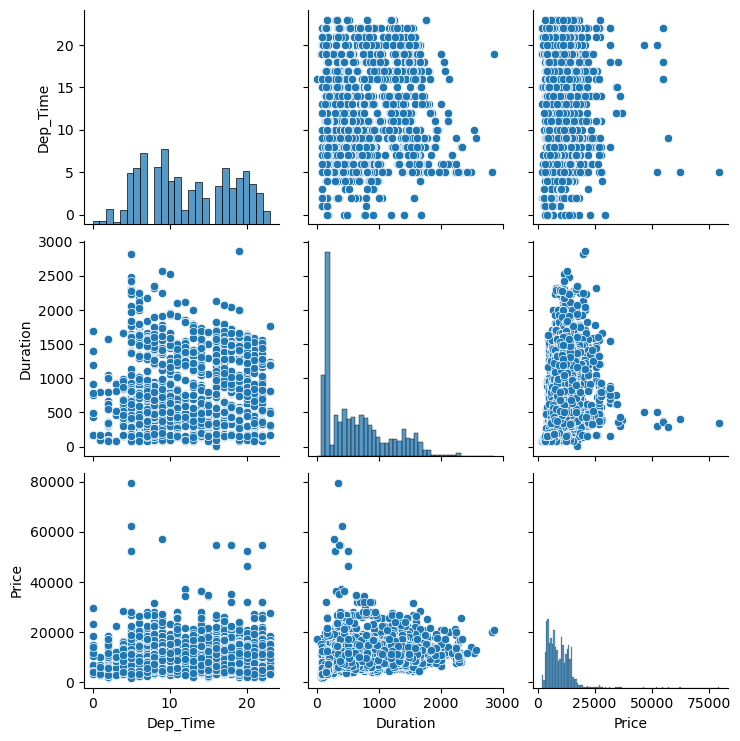

In [43]:
sns.pairplot(data=df)
plt.show()

## DATA PREPROCESSING

### Handle missing values

In [59]:
df.isnull().sum()

Airline        0
Source         0
Destination    0
Dep_Time       0
Duration       0
Total_Stops    1
Price          0
dtype: int64

In [61]:
df.Total_Stops.mode()

0    1 stop
Name: Total_Stops, dtype: object

In [63]:
df.loc[df["Total_Stops"].isnull(),"Total_Stops"] = "1 stop"

In [65]:
df.isnull().sum()

Airline        0
Source         0
Destination    0
Dep_Time       0
Duration       0
Total_Stops    0
Price          0
dtype: int64

In [67]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Dep_Time', 'Duration',
       'Total_Stops', 'Price'],
      dtype='object')

### Handle outliers

<Axes: xlabel='Duration'>

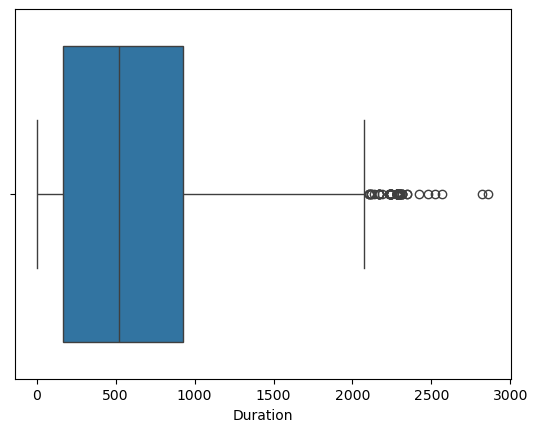

In [70]:
sns.boxplot(x=df['Duration'])

In [71]:
# Handle outliers using IQR
Q1 = df['Duration'].quantile(0.25) 
Q3 = df['Duration'].quantile(0.75)
#  Finding IQR
IQR = Q3 - Q1
IQR
# Define lower and upper bounds
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print("Q1:",Q1)
print("Q3:",Q3)
print("IQR:",IQR)
print("Lower Limit:",lower_limit)
print("Upper_limit:",upper_limit)

Q1: 170.0
Q3: 930.0
IQR: 760.0
Lower Limit: -970.0
Upper_limit: 2070.0


In [74]:
df.loc[(df['Duration']<lower_limit) | (df['Duration']>upper_limit),'Duration']=df['Duration'].median()

<Axes: xlabel='Duration'>

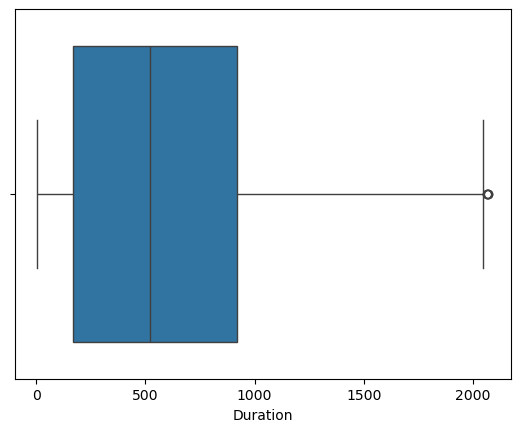

In [76]:
sns.boxplot(x=df['Duration'])

### CONVERSION OF CATEGORICAL VARIABLES

In [79]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [80]:
df['Duration'] = sc.fit_transform(df[['Duration']])

In [83]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder

In [85]:
airline_encoded = pd.get_dummies(df['Airline'], prefix='Airline')

# Concatenate the one-hot encoded columns back to the original dataset
df = pd.concat([df, airline_encoded], axis=1)

# Optionally drop the original 'Airline' column
df.drop('Airline', axis=1, inplace=True)


In [87]:
df

,Source,Destination,Dep_Time,Duration,Total_Stops,Price,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,Banglore,New Delhi,22,-0.942235,non-stop,3897,False,False,False,True,False,False,False,False,False,False,False,False
1,Kolkata,Banglore,5,-0.380248,2 stops,7662,False,True,False,False,False,False,False,False,False,False,False,False
2,Delhi,Cochin,9,1.040045,2 stops,13882,False,False,False,False,True,False,False,False,False,False,False,False
3,Kolkata,Banglore,18,-0.625479,1 stop,6218,False,False,False,True,False,False,False,False,False,False,False,False
4,Banglore,New Delhi,16,-0.707222,1 stop,13302,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Kolkata,Banglore,19,-0.983106,non-stop,4107,True,False,False,False,False,False,False,False,False,False,False,False
10679,Kolkata,Banglore,20,-0.972888,non-stop,4145,False,True,False,False,False,False,False,False,False,False,False,False
10680,Banglore,Delhi,8,-0.921799,non-stop,7229,False,False,False,False,True,False,False,False,False,False,False,False
10681,Banglore,New Delhi,11,-0.962670,non-stop,12648,False,False,False,False,False,False,False,False,False,False,True,False


In [89]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to 'Source' and 'Destination'
df['Source'] = le.fit_transform(df['Source'])
df['Destination'] = le.fit_transform(df['Destination'])

In [91]:
print("Source labels:", dict(zip(le.classes_, le.transform(le.classes_))))


Source labels: {'Banglore': 0, 'Cochin': 1, 'Delhi': 2, 'Hyderabad': 3, 'Kolkata': 4, 'New Delhi': 5}


In [93]:
df

,Source,Destination,Dep_Time,Duration,Total_Stops,Price,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,5,22,-0.942235,non-stop,3897,False,False,False,True,False,False,False,False,False,False,False,False
1,3,0,5,-0.380248,2 stops,7662,False,True,False,False,False,False,False,False,False,False,False,False
2,2,1,9,1.040045,2 stops,13882,False,False,False,False,True,False,False,False,False,False,False,False
3,3,0,18,-0.625479,1 stop,6218,False,False,False,True,False,False,False,False,False,False,False,False
4,0,5,16,-0.707222,1 stop,13302,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,3,0,19,-0.983106,non-stop,4107,True,False,False,False,False,False,False,False,False,False,False,False
10679,3,0,20,-0.972888,non-stop,4145,False,True,False,False,False,False,False,False,False,False,False,False
10680,0,2,8,-0.921799,non-stop,7229,False,False,False,False,True,False,False,False,False,False,False,False
10681,0,5,11,-0.962670,non-stop,12648,False,False,False,False,False,False,False,False,False,False,True,False


In [95]:
df['Total_Stops'] = df['Total_Stops'].replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4})

In [97]:
df

,Source,Destination,Dep_Time,Duration,Total_Stops,Price,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,5,22,-0.942235,0,3897,False,False,False,True,False,False,False,False,False,False,False,False
1,3,0,5,-0.380248,2,7662,False,True,False,False,False,False,False,False,False,False,False,False
2,2,1,9,1.040045,2,13882,False,False,False,False,True,False,False,False,False,False,False,False
3,3,0,18,-0.625479,1,6218,False,False,False,True,False,False,False,False,False,False,False,False
4,0,5,16,-0.707222,1,13302,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,3,0,19,-0.983106,0,4107,True,False,False,False,False,False,False,False,False,False,False,False
10679,3,0,20,-0.972888,0,4145,False,True,False,False,False,False,False,False,False,False,False,False
10680,0,2,8,-0.921799,0,7229,False,False,False,False,True,False,False,False,False,False,False,False
10681,0,5,11,-0.962670,0,12648,False,False,False,False,False,False,False,False,False,False,True,False


### FEATURE SELECTION

In [100]:
df.corr()

,Source,Destination,Dep_Time,Duration,Total_Stops,Price,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
Source,1.000000,-0.592574,0.059044,0.169796,0.192840,0.015998,-0.005967,0.038364,-0.090363,-0.059535,0.049980,-0.025889,0.014399,0.001416,0.027826,0.016831,-0.061915,-0.023050
Destination,-0.592574,1.000000,-0.072979,-0.267873,-0.295481,-0.071112,-0.054493,0.006673,0.026332,0.096282,-0.060105,0.035856,-0.105001,-0.010322,0.067855,0.010261,0.039905,0.025350
Dep_Time,0.059044,-0.072979,1.000000,0.028168,-0.061490,0.006819,0.045969,-0.013004,-0.016365,-0.023367,0.113980,-0.007522,-0.149969,-0.028669,-0.010434,0.000857,0.023918,-0.003374
Duration,0.169796,-0.267873,0.028168,1.000000,0.715298,0.507103,-0.101390,0.236014,-0.092299,-0.344536,0.320079,-0.011840,-0.003845,-0.001750,-0.266331,-0.008622,-0.014459,-0.016363
Total_Stops,0.192840,-0.295481,-0.061490,0.715298,1.000000,0.603883,-0.094427,0.271084,-0.060113,-0.302998,0.215039,0.017876,0.118389,0.009088,-0.274356,0.002519,-0.120452,-0.020460
Price,0.015998,-0.071112,0.006819,0.507103,0.603883,1.000000,-0.133044,0.050346,-0.095146,-0.361048,0.416135,0.253302,0.139803,0.017651,-0.296552,-0.010380,-0.060646,-0.000453
Airline_Air Asia,-0.005967,-0.054493,0.045969,-0.101390,-0.094427,-0.133044,1.000000,-0.077705,-0.023860,-0.085570,-0.131664,-0.004159,-0.062292,-0.006124,-0.050520,-0.001697,-0.038011,-0.002940
Airline_Air India,0.038364,0.006673,-0.013004,0.236014,0.271084,0.050346,-0.077705,1.000000,-0.060235,-0.216026,-0.332394,-0.010499,-0.157260,-0.015460,-0.127540,-0.004285,-0.095962,-0.007423
Airline_GoAir,-0.090363,0.026332,-0.016365,-0.092299,-0.060113,-0.095146,-0.023860,-0.060235,1.000000,-0.066332,-0.102063,-0.003224,-0.048288,-0.004747,-0.039162,-0.001316,-0.029466,-0.002279
Airline_IndiGo,-0.059535,0.096282,-0.023367,-0.344536,-0.302998,-0.361048,-0.085570,-0.216026,-0.066332,1.000000,-0.366037,-0.011562,-0.173177,-0.017025,-0.140449,-0.004719,-0.105675,-0.008175


<Axes: >

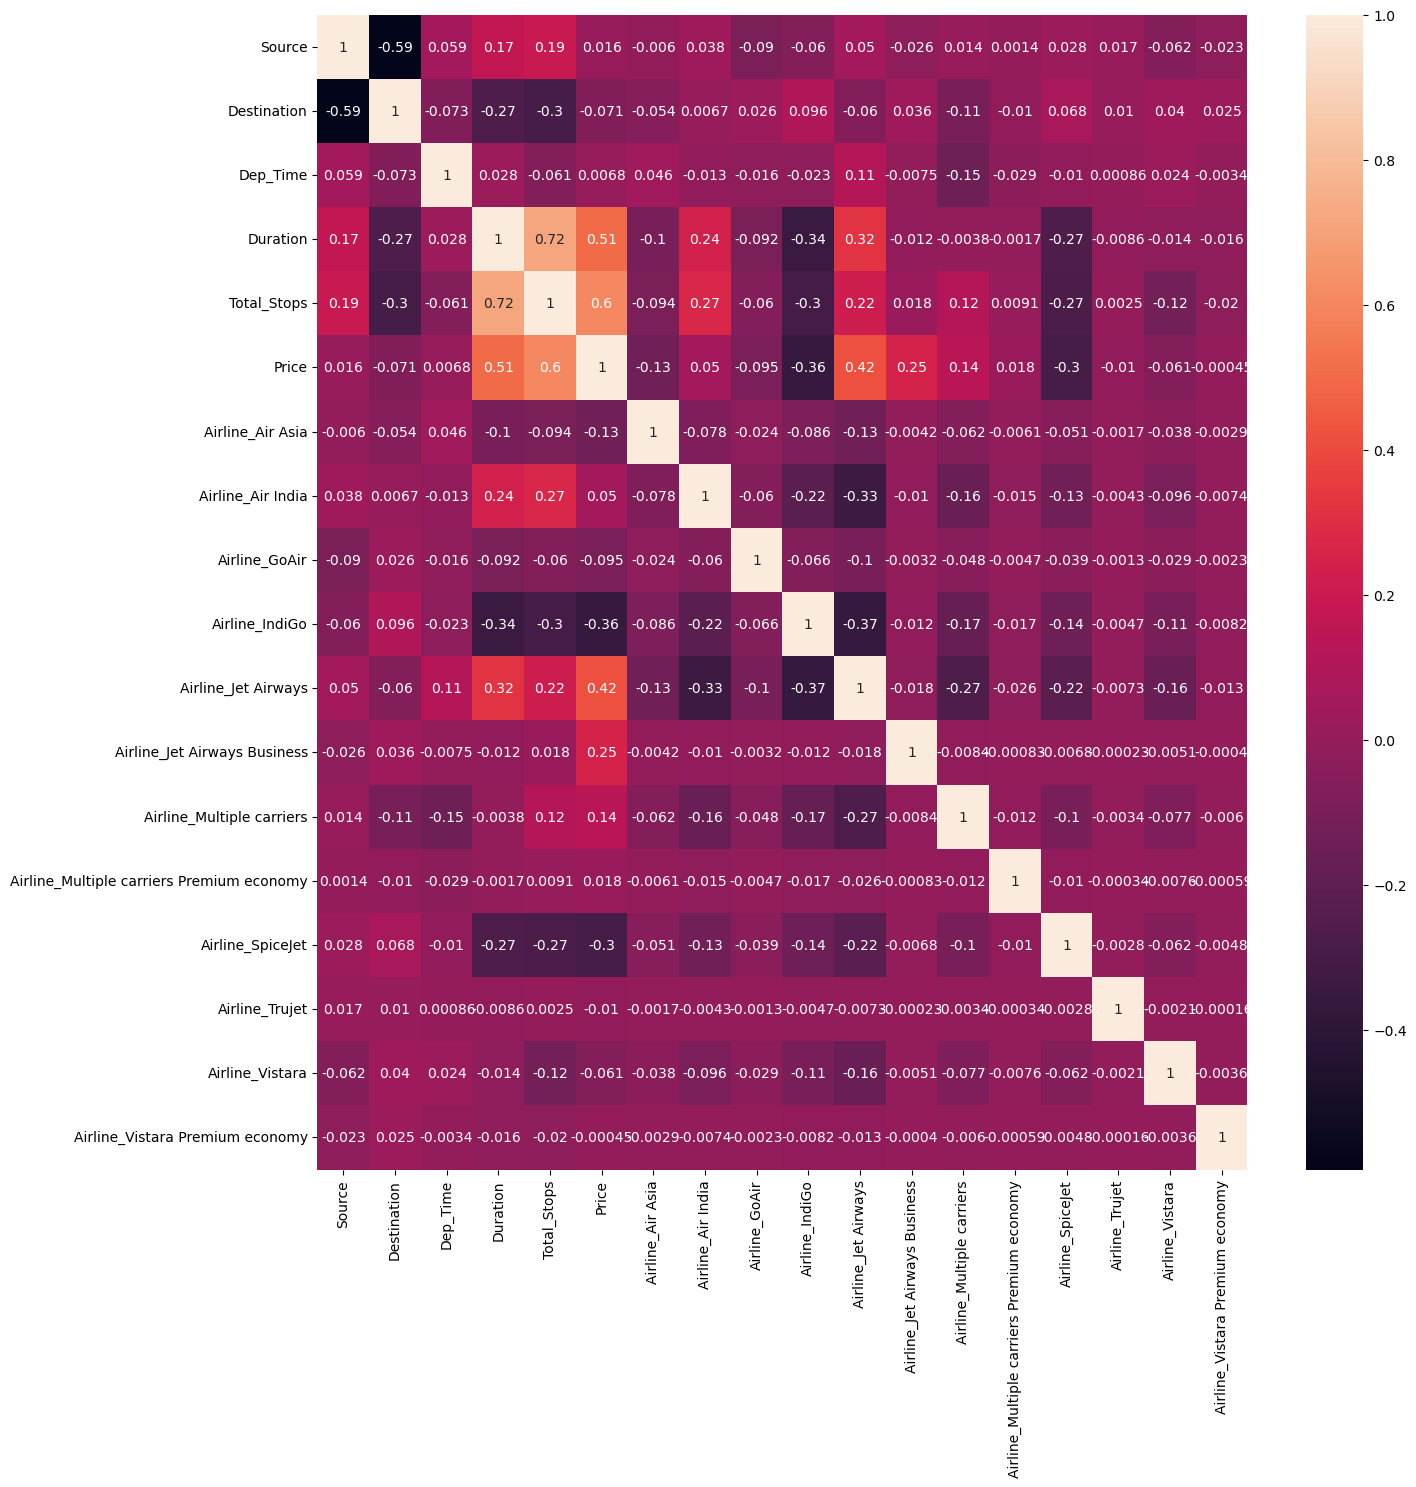

In [102]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

### MODEL BUILDING

In [104]:
X = df.drop('Price', axis=1)
Y = df['Price']

In [105]:
print(X.shape)
print(Y.shape)

(10683, 17)
(10683,)


In [106]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,Y, test_size=0.25, random_state=55)

In [107]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(8012, 17) (2671, 17)
(8012,) (2671,)


In [108]:
y_train.value_counts()

Price
10262    196
10844    169
7229     129
4804     121
4823     104
        ... 
7631       1
12854      1
18211      1
4651       1
18387      1
Name: count, Length: 1646, dtype: int64

In [112]:
# Model Selection 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Regression Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=42)
}

# Evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2),
        "R2 Score": round(r2, 3)
    })

# Results as DataFrame
results_df = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False)
print(results_df)


               Model      MAE     RMSE  R2 Score
3  Gradient Boosting  1828.75  2806.09     0.628
4            XGBoost  1723.97  2841.40     0.619
2      Random Forest  1706.96  2988.37     0.578
0  Linear Regression  2143.64  3069.51     0.555
1      Decision Tree  1749.24  3075.86     0.553


#### Hyperparameter Tuning

#### Decision Tree

In [118]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

param_grids =  {
        'max_depth': [3, 5, 7, 10, 15, 20, ],
        'min_samples_split': [2, 5, 10, 15],
        'min_samples_leaf': [1, 2, 4, 6, 8],
        'max_leaf_nodes': [50, 100, 200]}

tree_clf = DecisionTreeRegressor(random_state=3)#object creation for decision tree with random state 3
tree_cv = RandomizedSearchCV(tree_clf, param_grids, scoring="r2", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train,y_train)
best_params = tree_cv.best_params_#it will give best parameters 
print(f"Best paramters: {best_params})")#printing  best parameters

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best paramters: {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_leaf_nodes': 100, 'max_depth': 15})


In [119]:
dt1=DecisionTreeRegressor(max_depth=20,max_leaf_nodes=100,min_samples_leaf=4,min_samples_split=5,random_state=47)#passing best parameter to decision tree
dt1.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=20, max_leaf_nodes=100, min_samples_leaf=4,
                      min_samples_split=5, random_state=47)

In [120]:
y_preddt = model.predict(X_test)
y_train_predict = model.predict(X_train)
print("Train r2_score :", r2_score(y_train,y_train_predict))
print("Test r2_score :",r2_score(y_test,y_preddt))
print("r2 :",r2_score(y_test, y_preddt))


Train r2_score : 0.7608212828636169
Test r2_score : 0.618523120880127
r2 : 0.618523120880127


#### Randomforest Regressor

In [122]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
random_grid = {
        'n_estimators': [50, 100, 150, 200, 250, 300],
        'max_depth': [5, 10, 15, 20, 25, ],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']

    }


rf_clf1 = RandomForestRegressor(random_state=42)
rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='r2',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)



rf_cv.fit(X_train, y_train)##training data on randomsearch cv
rf_best_params = rf_cv.best_params_##it will give you best parameters 
print(f"Best paramters: {rf_best_params})")##printing  best parameters
 

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 250, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 25})


In [123]:
rf1 = RandomForestRegressor(n_estimators=250,min_samples_leaf=1,min_samples_split=10,max_features="sqrt",max_depth=25,random_state=99)
rf1.fit(X_train,y_train) #train model with best parameters
y_preddt = rf1.predict(X_test)
y_train_predict = rf1.predict(X_train)
print("Train r2_score :", r2_score(y_train,y_train_predict))
print("Test r2_score :",r2_score(y_test,y_preddt))
print("r2 :",r2_score(y_test, y_preddt))


Train r2_score : 0.7623330419896026
Test r2_score : 0.6349434437996204
r2 : 0.6349434437996204


#### Gradientboosting 

In [125]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
param_gbr= {
        'n_estimators': [50, 100, 150, 200, 250, 300],
        'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
        'max_depth': [2, 3, 4, 5, 6, 7, 8],
        'min_samples_split': [2, 4, 6, 8, 10]
    }

gbr_clf1 = GradientBoostingRegressor(random_state=42)
gbr_cv = RandomizedSearchCV(estimator=gbr_clf1, scoring='r2',param_distributions=param_gbr, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

gbr_cv.fit(X_train, y_train)##training data on randomsearch cv
gbr_best_params = gbr_cv.best_params_##it will give you best parameters 
print(f"Best paramters: {gbr_best_params})")##printing  best parameters
 

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 300, 'min_samples_split': 8, 'max_depth': 2, 'learning_rate': 0.2})


In [126]:
gbr1 = GradientBoostingRegressor(n_estimators=200,learning_rate=0.1,min_samples_split=6,max_depth=5,random_state=99)
gbr1.fit(X_train, y_train) #train model with best parameters
y_pred_gbr = gbr1.predict(X_test)
y_train_pred_gbr = gbr1.predict(X_train)
# Evaluation
print("Train R² Score :", r2_score(y_train, y_train_pred_gbr))
print("Test  R² Score :", r2_score(y_test, y_pred_gbr))
print("R² :", r2_score(y_test, y_pred_gbr))

Train R² Score : 0.7333305712651763
Test  R² Score : 0.6287259711306659
R² : 0.6287259711306659


#### xgboost

In [129]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
        'n_estimators': [50, 100, 150, 200, 250, 300],
        'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
        'max_depth': [3, 5, 7, 9, 12],
        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
        'gamma': [0, 0.1, 0.2, 0.3, 0.4]
    }

XGB =XGBRegressor(random_state=42, verbosity=0, silent=0)#assign in variable
rcv= RandomizedSearchCV(estimator=XGB, scoring='r2',param_distributions=param_grid, n_iter=100, cv=5, 
                               verbose=2,n_jobs=-1)#assign some parameters

rcv.fit(X_train, y_train)#fitting the model
cv_best_params = rcv.best_params_ #printing best parameters
print(f"Best paramters: {cv_best_params})")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best paramters: {'subsample': 0.7, 'n_estimators': 150, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0.4})


In [130]:
XGB2 = XGBRegressor(n_estimators=250, max_depth=5, learning_rate=0.1, gamma=0.3, subsample= 1.0)
XGB2.fit(X_train, y_train)#fiting thr model with best parameters
y_pred_ = XGB2.predict(X_test)
y_train_pred_ = XGB2.predict(X_train)
# Evaluation
print("Train R² Score :", r2_score(y_train, y_train_pred_))
print("Test  R² Score :", r2_score(y_test, y_pred_))
print("R² :", r2_score(y_test, y_pred_))

Train R² Score : 0.7343582510948181
Test  R² Score : 0.6334704160690308
R² : 0.6334704160690308


#####  After hyperparameter tuning
| Model             | Train R2 Score   | Test R2 Score   |
| ----------------- | ------- | ------- |
| Decision Tree     | 0.760   | 0.618   | 
| Random Forest     | 0.762   | 0.634   | 
| Gradient Boosting | 0.733   | 0.628   | 
| XGBoost           | 0.734   | 0.633   | 

### Model Comparision Report

The models included Linear Regression, Decision Tree Regressor, Random Forest Regressor, Gradient Boosting Regressor, and XGBoost Regressor.

Best Overall Model: RandomForest – It consistently delivers the highest accuracy after hyperparameter tuning(0.63), making it the most effective for this dataset.Its strong generalization and stable predictions.

Mild Overfitting or Underfitting: Decision Tree

Avoid: Linear Regression (underfitting)




### Data Analysis Report
**Data Collection**

Gather flight pricing dataset with features like airline, source and destination cities, departure and arrival times, duration, number of stops, travel date, and price (target variable).

**Exploratory Data Analysis (EDA)**

Univariate Analysis – Explore distributions of features such as duration, number of stops, and price.
Bivariate Analysis – Analyze relationships between individual features (e.g., airline vs. price, stops vs. price).
Multivariate Analysis – Understand how multiple features interact and influence price.

**Data Preprocessing**

**Handle missing values** and inconsistent formats (e.g., time, dates).

**Convert categorical features** (e.g., airline, source) using encoding techniques.

**Extract time-based features** like day, month, weekday from date/time fields.

**Standardize or normalize** numerical features (e.g., duration).

**Remove outliers** in price using IQR, Z-score, or domain thresholds.

**Feature Engineering**

Create new features from existing ones (e.g., total travel hours, time of day, weekend vs. weekday).
Perform feature selection using correlation analysis, feature importance scores, or recursive feature elimination.
Optionally reduce dimensionality using PCA if needed.

**Model Selection** & Training Train regression models such as:

Linear Regression,
Decision Tree Regressor,
Random Forest Regressor,
Gradient Boosting (e.g., XGBoost),
Support Vector Regressor (SVR)
  
**Model Evaluation** Use regression metrics to assess model performance:

Mean Absolute Error (MAE),
Mean Squared Error (MSE),
Root Mean Squared Error (RMSE),
R² Score (Coefficient of Determination)

**Hyperparameter Tuning** Improve model accuracy with:

Grid Search,
Random Search,
Cross-validation to avoid overfitting and ensure generalization


### Report on Challenges Faced
* Only two columns, ‘Route’ and ‘Total_Stops’, had missing values.
I filled these missing values using appropriate measures of central tendency (mean, median, or mode) depending on the data distribution.
* The column ‘Additional_Info’ contained no useful information for more than 80% of entries.Due to its lack of predictive significance, it was dropped from the dataset.
* Columns such as ‘Date_of_Journey’, ‘Dep_Time’, ‘Arrival_Time’, and ‘Duration’ were stored as object type strings.
I converted them into proper datetime/timestamp format using pd.to_datetime() and extracted separate features for hours and minutes to improve interpretability.

* After creating the new time-based columns, the original string columns were removed to avoid redundancy.

* Several categorical columns such as ‘Airline’, ‘Source’, ‘Destination’, and ‘Total_Stops’ required encoding.
I applied a combination of OneHotEncoding (for nominal variables) and Manual Label Encoding where necessary to make the data suitable for model training.


* I implemented and tuned multiple regression algorithms including Linear Regression, Decision Tree, Random Forest, Gradient Boosting, XGBoost

* The primary challenge was hyperparameter tuning and preventing overfitting, especially in ensemble models.

* By using RandomizedSearchCV with 5-fold cross-validation and evaluation metrics like MSE and R², I optimized model parameters effectively.